In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
from tqdm.notebook import tqdm
from IPython.display import Image

## 1. Разбегание траекторий
Построим разницу траекторий

In [2]:
dx = pd.read_csv("diffx.csv")
dv = pd.read_csv("diffv.csv")

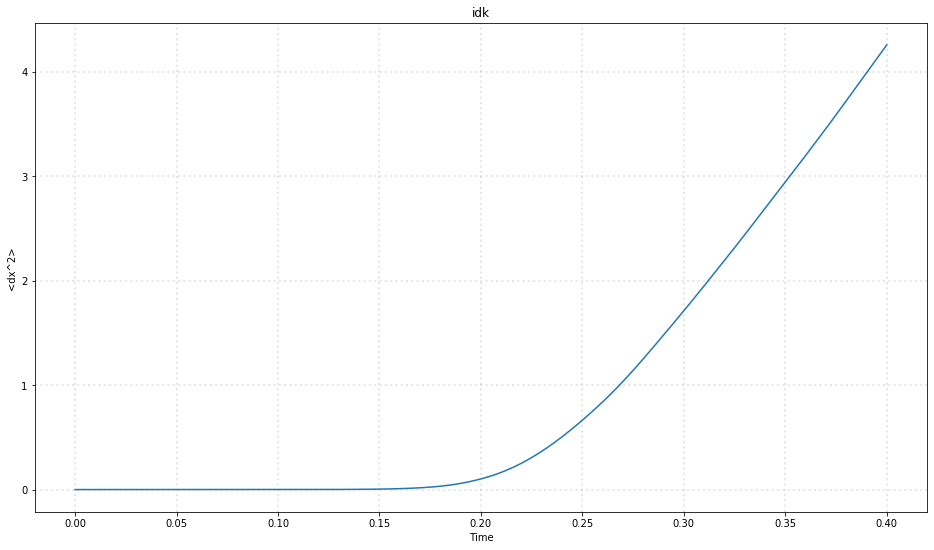

In [4]:
plt.plot(dx["time"][0:8000], dx["diff_x"][0:8000])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("<dx^2>")
plt.title("idk")
plt.show()

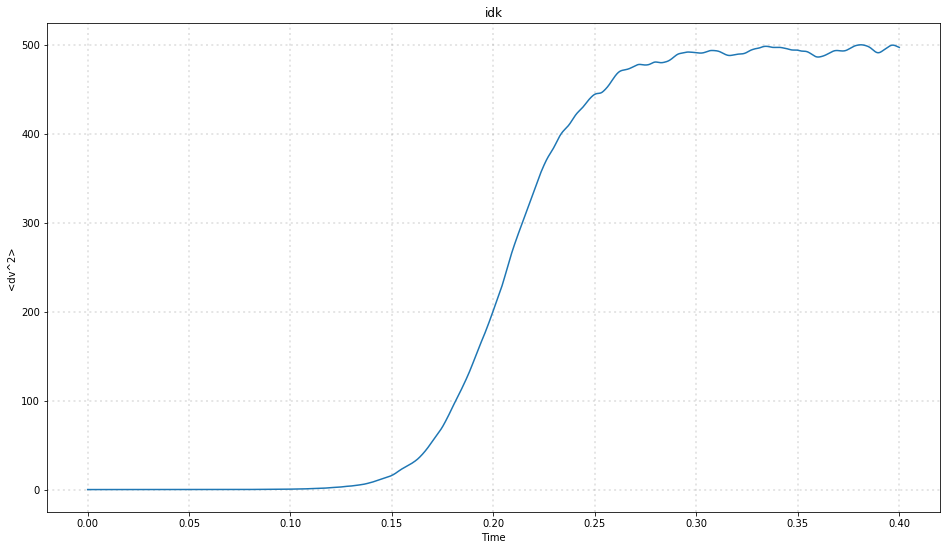

In [5]:
plt.plot(dv["time"][0:8000], dv["diff_v"][0:8000])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("<dv^2>")
plt.title("idk")
plt.show()

## Расчет коэффициента самодиффузии

### T=1.0

In [6]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

### Формула Эйнштейна-Смолуховского
$$ D = \lim_{t \to \infty} \frac{1}{6t}\langle |\pmb{r}_{i}(t) - \pmb{r}_{i}(0)|^{2} \rangle$$

In [7]:
with open("t_10.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [9]:
msd = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames - frame):
        msd[frame]+=np.square((x[frame+start]- x[start])).mean()/(frames - frame)
        msd[frame]+=np.square((y[frame+start] - y[start])).mean()/(frames - frame)
        msd[frame]+=np.square((z[frame+start] - z[start])).mean()/(frames - frame)

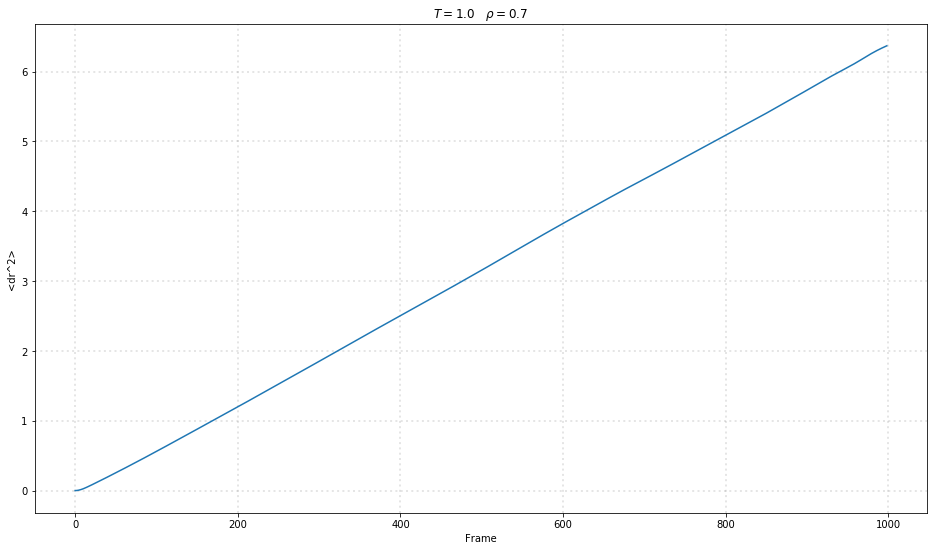

In [11]:
plt.plot(np.arange(0, frames, 1), msd)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("<dr^2>")
plt.title(r"$T=1.0 \quad \rho=0.7$")
plt.show()

In [12]:
d_es_10 = np.zeros(len(msd))
for frame in range(1, frames):
    d_es_10[frame] = msd[frame]/(6*frame*dt)

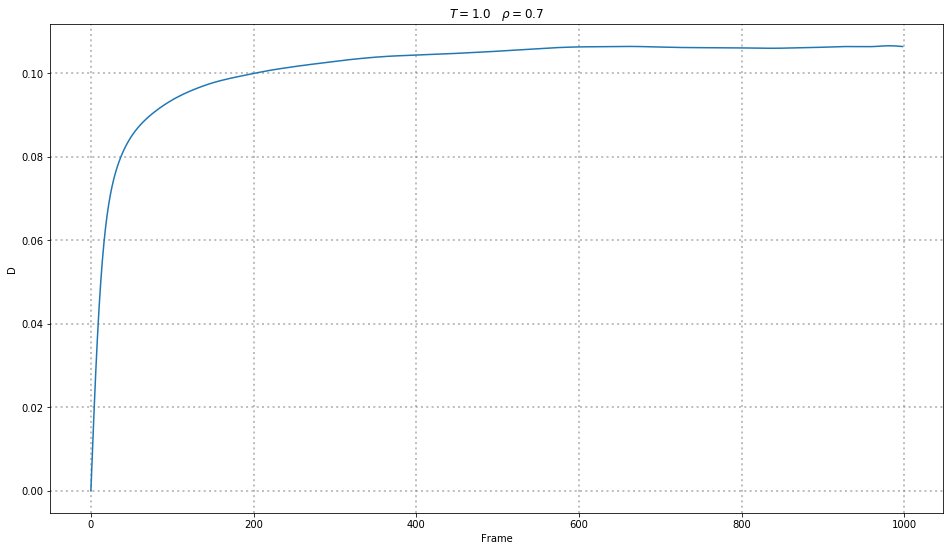

In [16]:
plt.plot(np.arange(0, frames, 1), d_es_10)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("D")
plt.title(r"$T=1.0 \quad \rho=0.7$")
plt.show()

### Формула Грина-Кубо
$$ D = \frac{1}{3} \int_0^\infty \langle v_{i}(t) \cdot v_{i}(0) dt\rangle$$

In [18]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

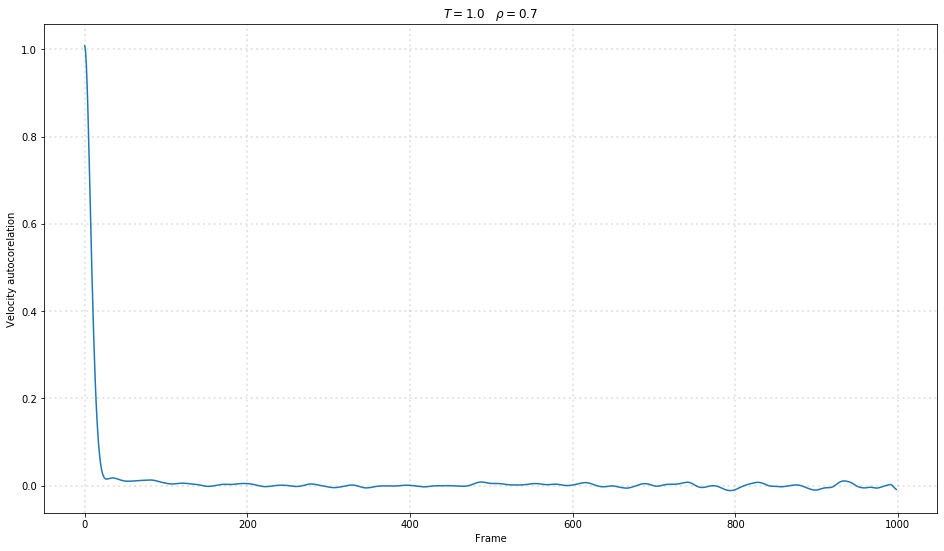

In [19]:
plt.plot(np.arange(0, frames, 1), vac)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$T=1.0 \quad \rho=0.7$")
plt.show()

In [20]:
d_gk_10 = 0
for i in range(1, frames):
    d_gk_10+=0.5*dt*(vac[i-1]+vac[i])
print(d_gk_10)

0.10662560990633724


### T=1.5

In [21]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

### Формула Эйнштейна-Смолуховского

In [23]:
with open("t_15.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [24]:
msd = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames - frame):
        msd[frame]+=np.square((x[frame+start]- x[start])).mean()/(frames - frame)
        msd[frame]+=np.square((y[frame+start] - y[start])).mean()/(frames - frame)
        msd[frame]+=np.square((z[frame+start] - z[start])).mean()/(frames - frame)

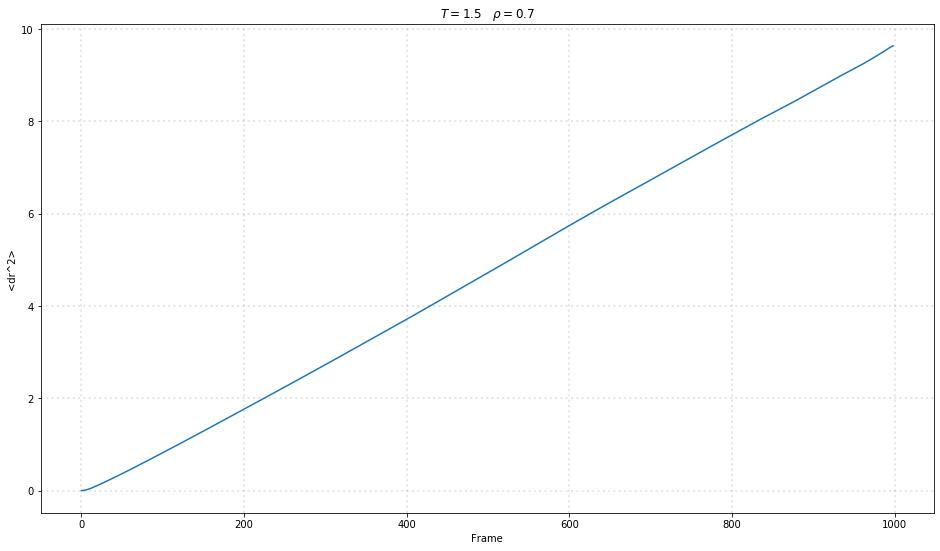

In [25]:
plt.plot(np.arange(0, frames, 1), msd)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("<dr^2>")
plt.title(r"$T=1.5 \quad \rho=0.7$")
plt.show()

In [26]:
d_es_15 = np.zeros(len(msd))
for frame in range(1, frames):
    d_es_15[frame] = msd[frame]/(6*frame*dt)

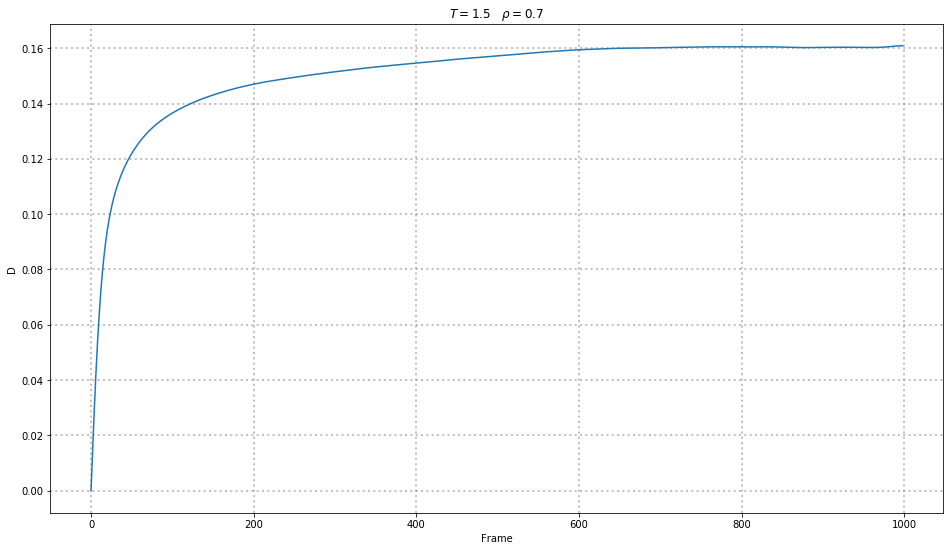

In [27]:
plt.plot(np.arange(0, frames, 1), d_es_15)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("D")
plt.title(r"$T=1.5 \quad \rho=0.7$")
plt.show()

### Формула Грина-Кубо

In [28]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

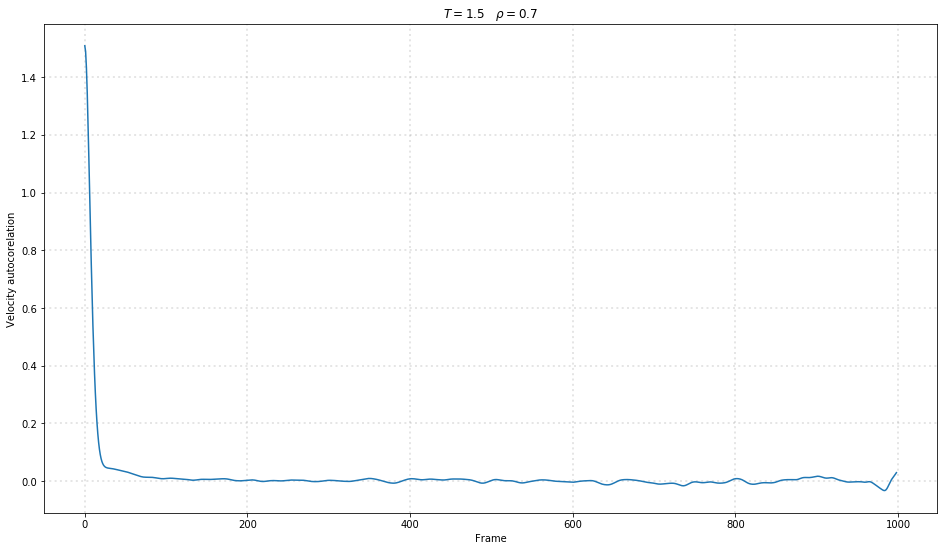

In [30]:
plt.plot(np.arange(0, frames, 1), vac)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$T=1.5 \quad \rho=0.7$")
plt.show()

In [31]:
d_gk_15 = 0
for i in range(1, frames):
    d_gk_15+=0.5*dt*(vac[i-1]+vac[i])
print(d_gk_15)

0.16142514438787164


### T=2.0

In [32]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

### Формула Эйнштейна-Смолуховского

In [33]:
with open("t_20.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [34]:
msd = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames - frame):
        msd[frame]+=np.square((x[frame+start]- x[start])).mean()/(frames - frame)
        msd[frame]+=np.square((y[frame+start] - y[start])).mean()/(frames - frame)
        msd[frame]+=np.square((z[frame+start] - z[start])).mean()/(frames - frame)

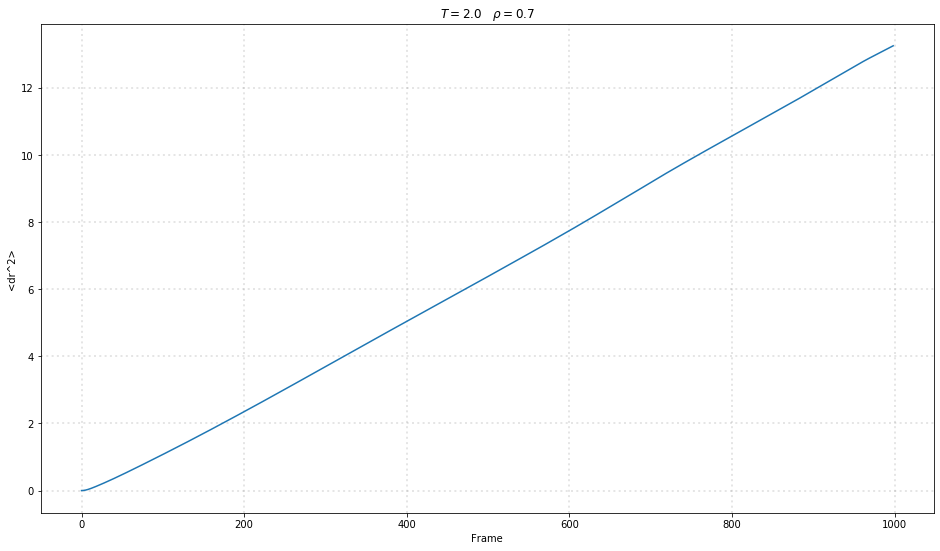

In [35]:
plt.plot(np.arange(0, frames, 1), msd)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("<dr^2>")
plt.title(r"$T=2.0 \quad \rho=0.7$")
plt.show()

In [36]:
d_es_20 = np.zeros(len(msd))
for frame in range(1, frames):
    d_es_20[frame] = msd[frame]/(6*frame*dt)

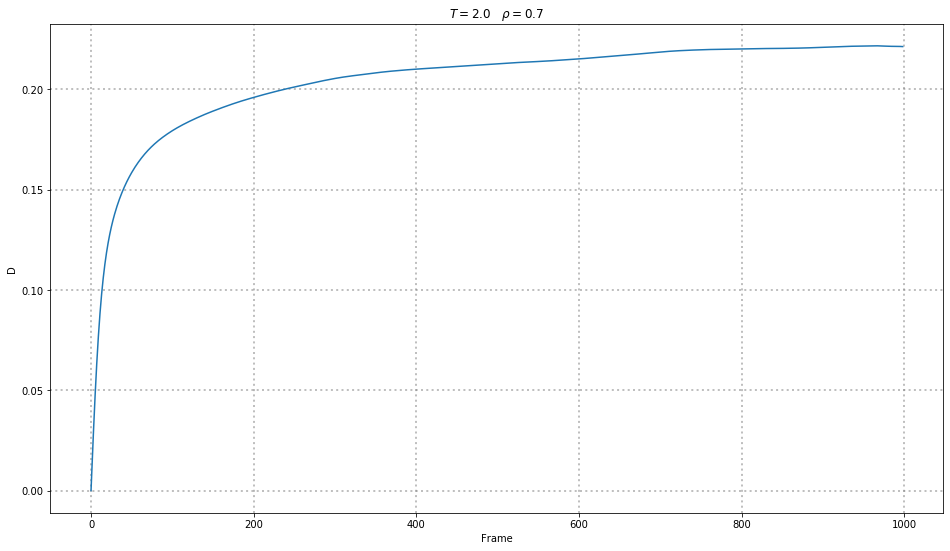

In [37]:
plt.plot(np.arange(0, frames, 1), d_es_20)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("D")
plt.title(r"$T=2.0 \quad \rho=0.7$")
plt.show()

### Формула Грина-Кубо

In [38]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

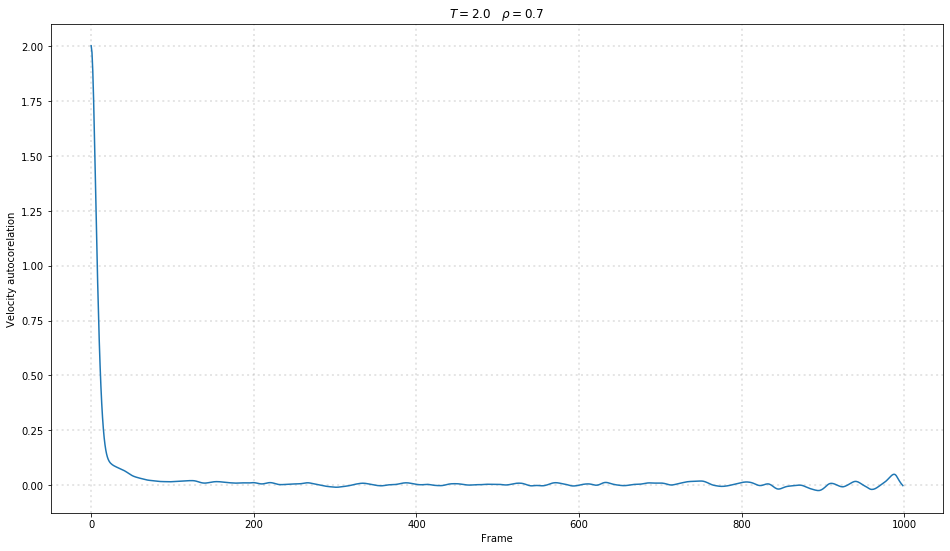

In [39]:
plt.plot(np.arange(0, frames, 1), vac)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$T=2.0 \quad \rho=0.7$")
plt.show()

In [40]:
d_gk_20 = 0
for i in range(1, frames):
    d_gk_20+=0.5*dt*(vac[i-1]+vac[i])
print(d_gk_20)

0.23680356009487286


### Автокорелляции скорости

### GAS

In [53]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

In [54]:
with open("gas.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [55]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

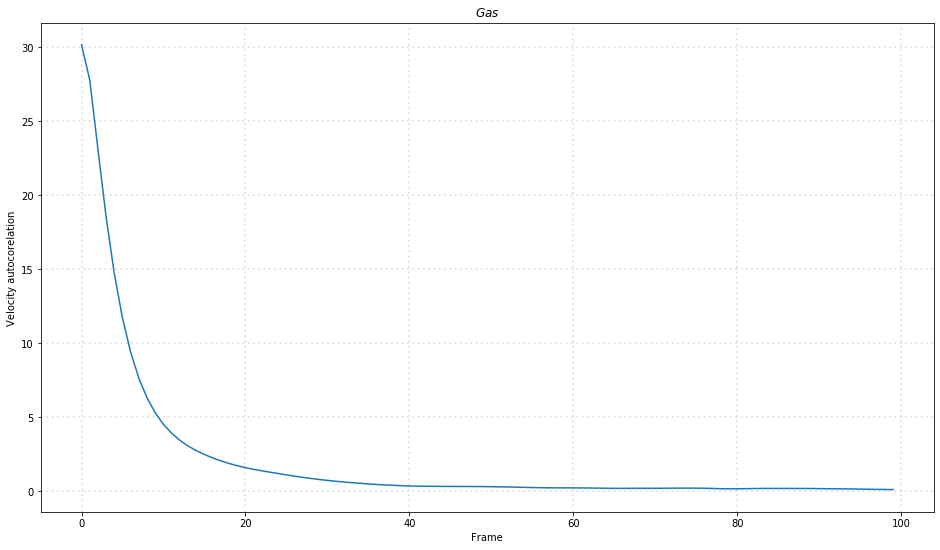

In [56]:
plt.plot(np.arange(0, 100, 1), vac[0:100])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$Gas$")
plt.show()

### Liquid close to solid

In [46]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

In [57]:
with open("liquid.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [58]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

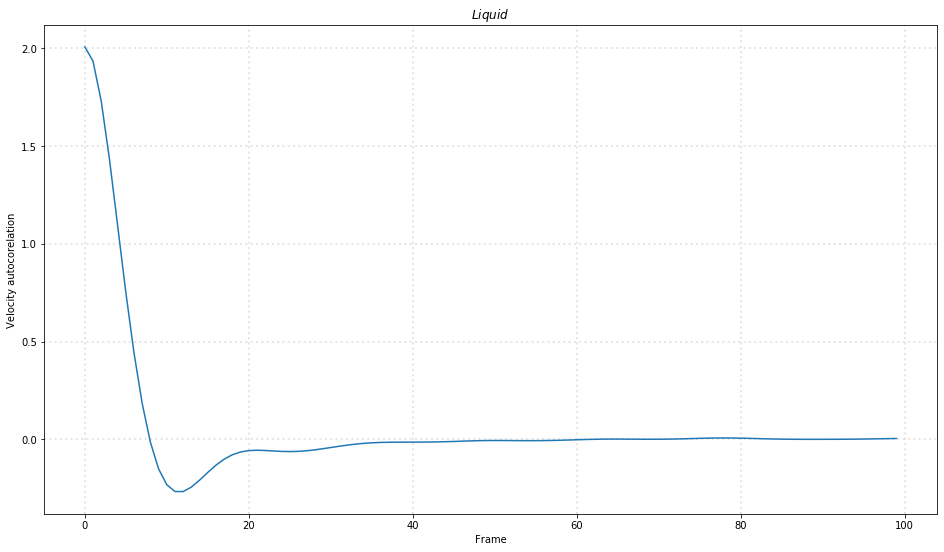

In [60]:
plt.plot(np.arange(0, 100, 1), vac[0:100])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$Liquid$")
plt.show()

### Liquid close to gas

In [61]:
frames = 999
particles = 1024
dt = 1e-2
x = np.zeros((frames, particles))
y = np.zeros((frames, particles))
z = np.zeros((frames, particles))
vx = np.zeros((frames, particles))
vy = np.zeros((frames, particles))
vz = np.zeros((frames, particles))

In [62]:
with open("trans.xyz", "r") as file:
    for frame in tqdm(range(0,frames), desc="Frame"):
        try:
            n = int(file.readline())
        except:
            break
        file.readline()

        coord = []

        for i in range(0,n):
            line = file.readline()
            coord = [float(j) for j in line.split(" ")]

            x[frame][i] = coord[0]
            y[frame][i] = coord[1]
            z[frame][i] = coord[2]

            vx[frame][i] = coord[3]
            vy[frame][i] = coord[4]
            vz[frame][i] = coord[5]

In [63]:
vac = np.zeros(frames)

for frame in tqdm(range(0,frames), desc="Frame"):
    for start in range(0, frames-frame):
        vac[frame]+=np.multiply(vx[frame+start],vx[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vy[frame+start],vy[start]).mean()/(3*(frames-frame))
        vac[frame]+=np.multiply(vz[frame+start],vz[start]).mean()/(3*(frames-frame))

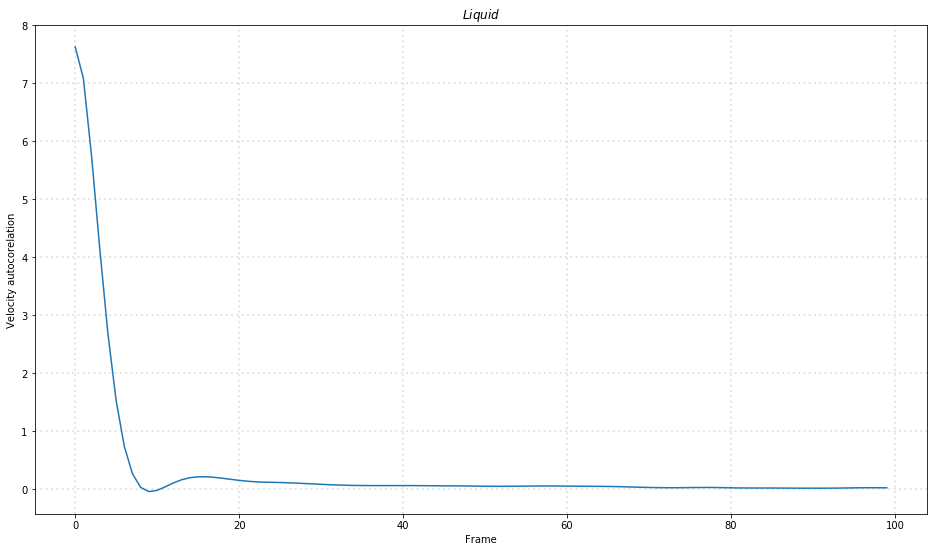

In [65]:
plt.plot(np.arange(0, 100, 1), vac[0:100])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Velocity autocorelation")
plt.title(r"$Liquid$")
plt.show()